In [1]:
import numpy as np
import scipy.linalg as lin
import toriccode.env as tc
from toriccode.utils import tensor_product
from matplotlib import pyplot as plt
import itertools
from toriccode.plot_utils import *
# from jupyterthemes import jtplot
# jtplot.style()
plt.style.use('dark_background') 

In [28]:
(12 / 2)**2 * np.pi * 12

1357.1680263507906

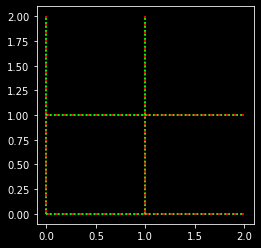

In [20]:
GRID_POINT_CLASS = tc.make_grid_point_torus(2,2)

from toriccode.plot_utils import plot_links, plot_link_periodic
local_terms = (
    [tc.Star(GRID_POINT_CLASS.new(i,j)) for i,j in itertools.product([0,1],[0,1])]
    + [tc.Plaquette(GRID_POINT_CLASS.new(i,j)) for i,j in itertools.product([0,1],[0,1])]
)
plot_kwargs = {
    tc.Star: dict(c='red', linestyle='--'),
    tc.Plaquette: dict(c='lime', linestyle='dotted')
}
for term in local_terms:
    plot_links(term, plot_link_fn=plot_link_periodic, **plot_kwargs[type(term)])

plt.gca().set_aspect(1)

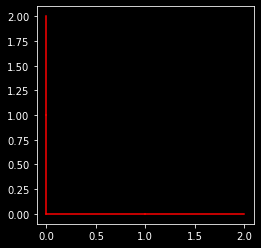

In [9]:
plot_links(local_terms[0], plot_link_fn=plot_link_periodic, c='red')
plt.gca().set_aspect(1)

In [7]:
link = local_terms[0].links[3]
print(link.points)
print(link_position_periodic(link))

(GridPointTorus22(p=(0, 1)), GridPointTorus22(p=(0, 0)))
[[0 1]
 [0 2]]


In [25]:
set(tc.Link.new(link.p0, link.direction, None) for term in local_terms for link in term.links)

8

In [10]:
[str(s) for term in local_terms for s in term.links]

['Link(GridPointTorus22(0, 0), H, Z)',
 'Link(GridPointTorus22(0, 0), V, Z)',
 'Link(GridPointTorus22(1, 0), H, Z)',
 'Link(GridPointTorus22(0, 1), V, Z)',
 'Link(GridPointTorus22(0, 1), H, Z)',
 'Link(GridPointTorus22(0, 1), V, Z)',
 'Link(GridPointTorus22(1, 1), H, Z)',
 'Link(GridPointTorus22(0, 0), V, Z)',
 'Link(GridPointTorus22(1, 0), H, Z)',
 'Link(GridPointTorus22(1, 0), V, Z)',
 'Link(GridPointTorus22(0, 0), H, Z)',
 'Link(GridPointTorus22(1, 1), V, Z)',
 'Link(GridPointTorus22(1, 1), H, Z)',
 'Link(GridPointTorus22(1, 1), V, Z)',
 'Link(GridPointTorus22(0, 1), H, Z)',
 'Link(GridPointTorus22(1, 0), V, Z)',
 'Link(GridPointTorus22(0, 0), H, X)',
 'Link(GridPointTorus22(0, 0), V, X)',
 'Link(GridPointTorus22(1, 0), V, X)',
 'Link(GridPointTorus22(0, 1), H, X)']

In [18]:
def print_ls(ls):
    return [str(v) for v in ls]

In [19]:
print_ls(local_terms[0].links)

['Link(GridPointTorus22(0, 0), H, Z)',
 'Link(GridPointTorus22(0, 0), V, Z)',
 'Link(GridPointTorus22(1, 0), H, Z)',
 'Link(GridPointTorus22(0, 1), V, Z)']

In [14]:
all_links = [link for term in local_terms for link in term.links]
all(link in all_links for term in local_terms for link in term.links)

True

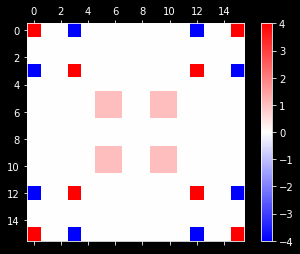

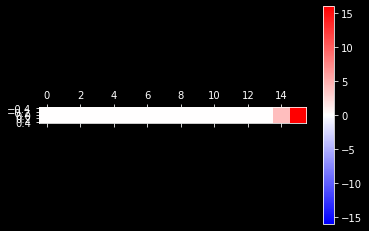

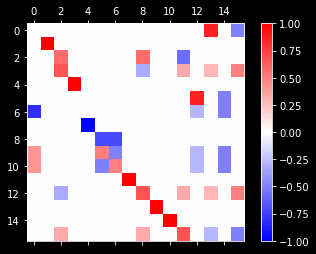

In [9]:
def build_H(terms):
    return sum(
        tensor_product(
            (link.operator.matrix for link in term.links)
        ).reshape(16,16)
        for term in terms
    )

h = build_H(local_terms)
plot_bwr(h)
eigs, vecs = lin.eigh(h)
plot_bwr(eigs.reshape(1,-1))
plot_bwr(vecs); 

In [16]:
PRECISION = 10

In [17]:
np.round(eigs, PRECISION)

array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  4., 16.])

In [19]:
np.round(vecs, PRECISION)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.8660254 ,  0.        ,
        -0.5       ],
       [ 0.        ,  1.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.57735027,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.57735027,  0.        ,
         0.        , -0.57735027,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        , -0.        ,  0.66666667,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.33333333,  0.        ,
         0.        ,  0.33333333,  0.        ,  0.28867513,  0.        ,
         0.5       ],
       [ 0.        ,  0.        ,  0